In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('ab.csv')
data

,Unnamed: 0,Alpha_angle,Beta_angle,a2,b2
0,0,60.175145,71.658648,60.911922,72.195813
1,1,64.934533,67.635025,64.235836,68.706409
2,2,55.108782,71.233127,55.425148,69.096508
3,3,51.719422,77.412510,52.873240,76.084468
4,4,53.492853,78.908821,52.887574,77.166322
...,...,...,...,...,...
221,221,65.727637,67.927972,68.352641,67.858746
222,222,65.273215,70.321420,68.574194,69.898204
223,223,76.105283,61.484925,76.534792,62.533274
224,224,67.907503,65.394810,69.353710,59.819239


In [ ]:
# Results of the Bland-Altman method, primarily the mean, the P-value (used to aid in determining consistency), and 
# the value of the Limits of Consistency (LoA).

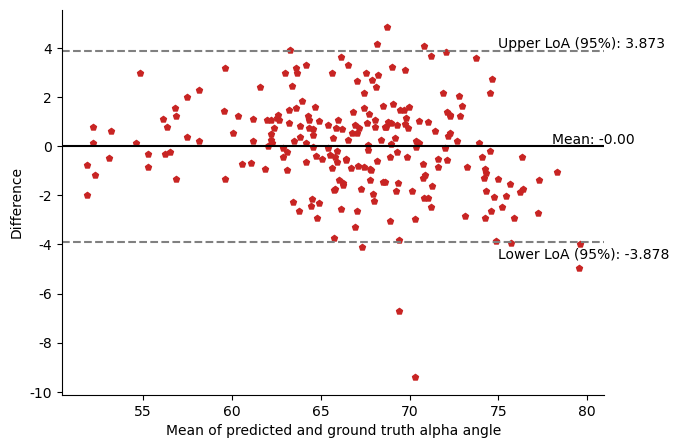

In [8]:
# Repetition factor 3.867
# p-value (original assumption of 0 difference) 0.509
# Chart Note: The above table shows the Bland-Altman plot for analyzing consistency. 
# The more points are within 95% LoA (dotted line in the graph), the better the consistency.
# Intelligent Analysis: The Bland-Altman plot shows that 0.044% (10/226) of the points are outside the 95% LoA.
score1=data['Alpha_angle'].values
score2=data['a2'].values
mean=np.mean([score1,score2],axis=0)
diff=score1-score2
md=np.mean(diff)
sd=np.std(diff,axis=0)
plt.figure(figsize=(7,5))
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.rc('axes', unicode_minus=False) 
plt.scatter(mean, diff,color='#C82423',s=20, marker='p')
plt.axhline(md, color='black', linestyle='-', label='Mean')
plt.text(78, md, f'Mean: {md:.2f}', ha='left', va='bottom')
plt.axhline(3.873, color='gray', linestyle='--', label='Upper LoA (95%)')
plt.text(75, 3.873, 'Upper LoA (95%): 3.873', ha='left', va='bottom')
plt.axhline(-3.878, color='gray', linestyle='--', label='Lower LoA (95%)')
plt.text(75, -4.1, 'Lower LoA (95%): -3.878', ha='left', va='top')
plt.xlabel('Mean of predicted and ground truth alpha angle')
plt.ylabel('Difference')
plt.savefig('Alpha_散点图.png',dpi=800)

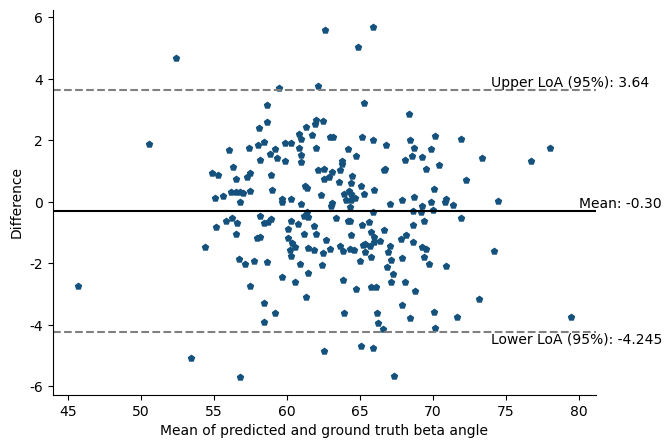

In [9]:
# Repetition factor 3.978
# p-value (original assumption of 0 difference) 0.988
# Chart Note: The above table shows the Bland-Altman plot for analyzing consistency. 
# The more points are within 95% LoA (dotted line in the graph), the better the consistency.
# Intelligent Analysis: The Bland-Altman plot shows that 0.053% (12/226) of the points are outside the 95% LoA.
score1=data['Beta_angle'].values
score2=data['b2'].values
mean=np.mean([score1,score2],axis=0)
diff=score1-score2
md=np.mean(diff)
sd=np.std(diff,axis=0)
plt.figure(figsize=(7,5))
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.rc('axes', unicode_minus=False)
plt.scatter(mean, diff,color='#14517C',s=20, marker='p')
plt.axhline(md,color='black', linestyle='-', label='Mean')
plt.text(80, md, f'Mean: {md:.2f}', ha='left', va='bottom')
plt.axhline(3.64, color='gray', linestyle='--', label='Upper LoA (95%)')
plt.text(74, 3.64, 'Upper LoA (95%): 3.64', ha='left', va='bottom')
plt.axhline(-4.245, color='gray', linestyle='--', label='Lower LoA (95%)')
plt.text(74, -4.245, 'Lower LoA (95%): -4.245', ha='left', va='top')
plt.xlabel('Mean of predicted and ground truth beta angle')
plt.ylabel('Difference')
plt.savefig('Beta_散点图.png',dpi=800)

In [ ]:
# Plotting Scatter Plots

1.0158872333575333 -1.0592008327290472


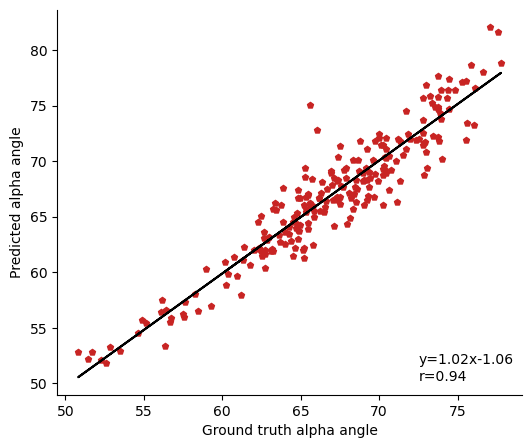

In [6]:
from sklearn.linear_model import LinearRegression
score1 = data['Alpha_angle'].values.reshape(-1, 1)
score2 = data['a2'].values.reshape(-1, 1)
regression_model = LinearRegression()
regression_model.fit(score1, score2)
slope = regression_model.coef_[0][0]
intercept = regression_model.intercept_[0]
plt.figure(figsize=(6,5))
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.rc('axes', unicode_minus=False)
plt.scatter(score1, score2, color='#C82423', s=20, marker='p')
plt.xlabel('Ground truth alpha angle')
plt.ylabel('Predicted alpha angle')
plt.text(72.5, 51.5, f'y=1.02x-1.06', ha='left', va='bottom')
plt.text(72.5, 50, f'r=0.94', ha='left', va='bottom')
plt.plot(score1, slope * score1 + intercept, color='black', linestyle='-')
plt.savefig('Alpha_r图.png',dpi=800)
print(slope,intercept)

0.9625913717533706 2.6696754240205607


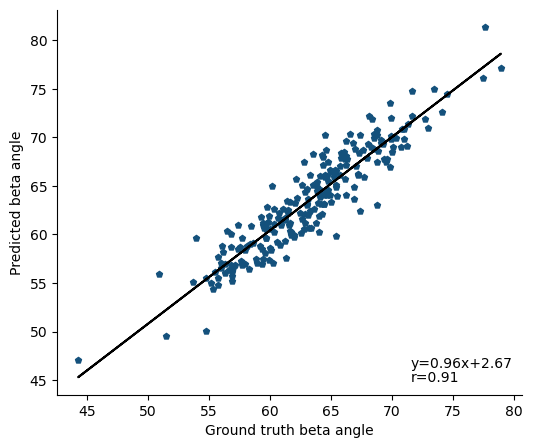

In [7]:
from sklearn.linear_model import LinearRegression
score1 = data['Beta_angle'].values.reshape(-1, 1)
score2 = data['b2'].values.reshape(-1, 1)
regression_model = LinearRegression()
regression_model.fit(score1, score2)
slope = regression_model.coef_[0][0]
intercept = regression_model.intercept_[0]
plt.figure(figsize=(6,5))
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.rc('axes', unicode_minus=False) 
plt.scatter(score1, score2, color='#14517C', s=20, marker='p')
plt.xlabel('Ground truth beta angle') 
plt.ylabel('Predicted beta angle') 
plt.text(71.5, 46, f'y=0.96x+2.67', ha='left', va='bottom')
plt.text(71.5, 44.5, f'r=0.91', ha='left', va='bottom')
plt.plot(score1, slope * score1 + intercept, color='black', linestyle='-')
plt.savefig('Beta_r图.png',dpi=800)
print(slope,intercept)

In [5]:
data=pd.read_csv('soft_hard.csv')
data

,Unnamed: 0,C4_Y,C4,C4_Y.1,C4.1
0,0.0200,2.995,3.401,2.100,2.422
1,0.0100,2.281,2.206,1.947,2.012
2,0.0050,1.962,1.913,1.820,1.842
3,0.0010,1.668,1.675,1.752,1.773
4,0.0001,1.629,1.610,1.748,1.713
5,0.0000,1.631,1.613,1.748,1.706


In [ ]:
# Robustness Evaluation of Multi-task Learning by Combining Soft and Hard Parameters

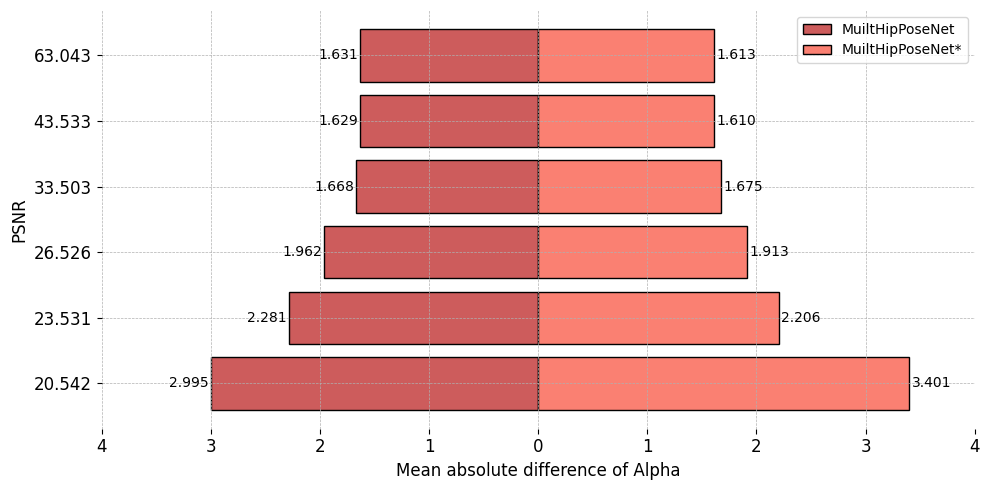

In [42]:
import matplotlib.pyplot as plt
import numpy as np
first_column = [2.995,2.281,1.962,1.668,1.629,1.631]
labels = ['20.542', '23.531', '26.526', '33.503', '43.533','63.043']
second_column = [3.401,2.206,1.913,1.675,1.61,1.613]
first_column = np.array(first_column)
second_column = np.array(second_column)
labels = np.array(labels)
fig, ax = plt.subplots(figsize=(10, 5))
bars1 = ax.barh(labels, -first_column, align='center', color='#CD5C5C', edgecolor='black', label='MuiltHipPoseNet')
bars2 = ax.barh(labels, second_column, align='center', color='#FA8072', edgecolor='black', label='MuiltHipPoseNet*')
for bar in bars1:
    ax.text(bar.get_width() - 0.02, bar.get_y() + bar.get_height() / 2, f'{-bar.get_width():.3f}', 
            va='center', ha='right', color='black', fontsize=10)
for bar in bars2:
    ax.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.3f}', 
            va='center', ha='left', color='black', fontsize=10)
xticks = [-4,-3,-2,-1,0,1,2,3,4]
ax.set_yticks(labels)
ax.set_yticklabels(labels, fontsize=12)
ax.set_xticks(xticks)
ax.set_xticklabels(['4','3','2','1','0','1','2','3','4'], fontsize=12)
ax.set_xlabel('Mean absolute difference of Alpha', fontsize=12)
ax.set_ylabel('PSNR', fontsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.legend()
plt.tight_layout()
plt.savefig('Alpha_hu图.png',dpi=800)

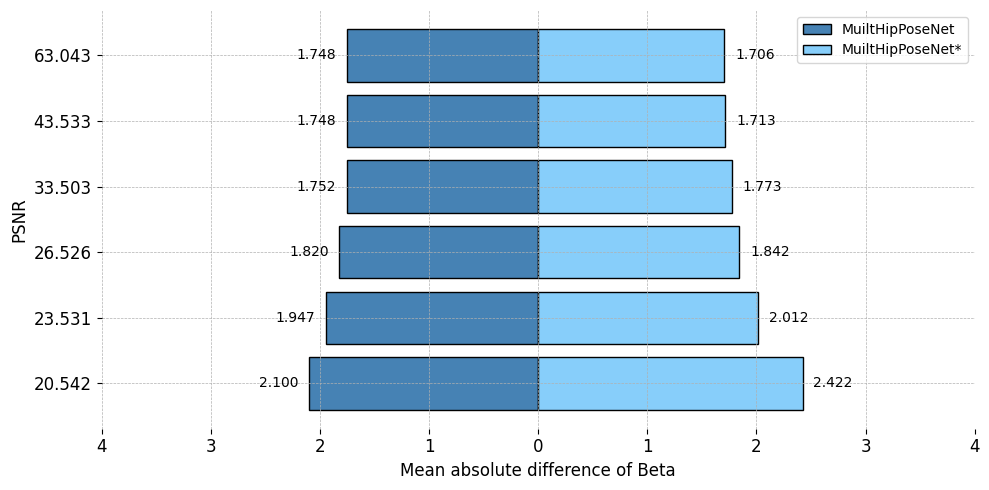

In [45]:
import matplotlib.pyplot as plt
import numpy as np
first_column = [2.1,1.947,1.82,1.752,1.748,1.748]
labels = ['20.542', '23.531', '26.526', '33.503', '43.533','63.043']
second_column = [2.422,2.012,1.842,1.773,1.713,1.706]
first_column = np.array(first_column)
second_column = np.array(second_column)
labels = np.array(labels)
fig, ax = plt.subplots(figsize=(10, 5))
bars1 = ax.barh(labels, -first_column, align='center', color='#4682B4', edgecolor='black', label='MuiltHipPoseNet')
bars2 = ax.barh(labels, second_column, align='center', color='#87CEFA', edgecolor='black', label='MuiltHipPoseNet*')
for bar in bars1:
    ax.text(bar.get_width() - 0.1, bar.get_y() + bar.get_height() / 2, f'{-bar.get_width():.3f}', 
            va='center', ha='right', color='black', fontsize=10)
for bar in bars2:
    ax.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.3f}', 
            va='center', ha='left', color='black', fontsize=10)
xticks = [-4,-3,-2,-1,0,1,2,3,4]
ax.set_yticks(labels)
ax.set_yticklabels(labels, fontsize=12)
ax.set_xticks(xticks)
ax.set_xticklabels(['4','3','2','1','0','1','2','3','4'], fontsize=12)
ax.set_xlabel('Mean absolute difference of Beta', fontsize=12)
ax.set_ylabel('PSNR', fontsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.legend()
plt.tight_layout()
plt.savefig('Beta_hu图.png',dpi=800)

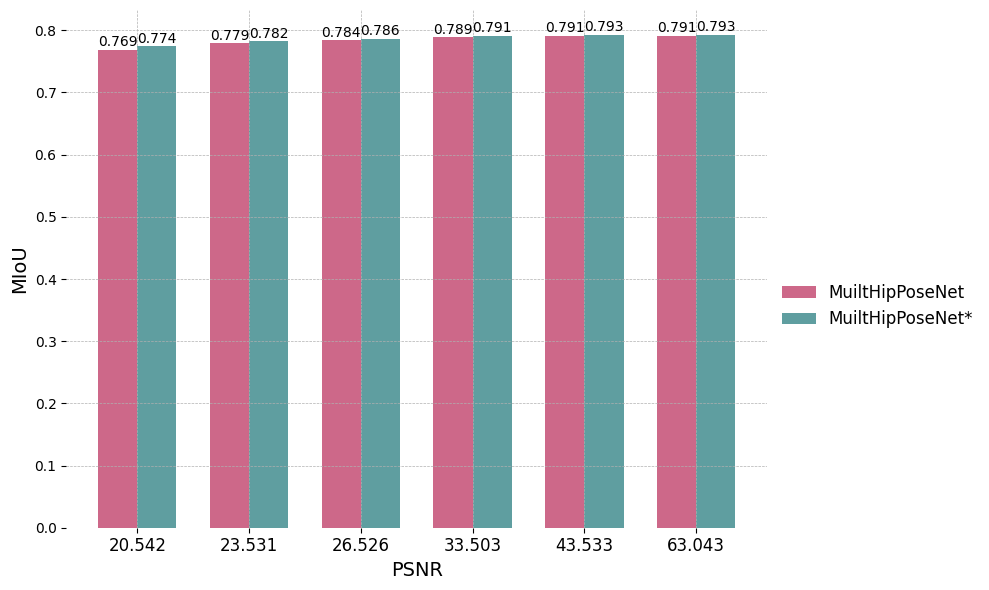

In [83]:
import matplotlib.pyplot as plt
import numpy as np
# Define model name, accuracy and sensitivity data
models = ['20.542', '23.531', '26.526', '33.503', '43.533','63.043']
accuracy = [0.769, 0.779, 0.784, 0.789, 0.791, 0.791]
sensitivity = [0.774, 0.782, 0.786, 0.791, 0.793, 0.793]
x = np.arange(len(models))
width = 0.35  
fig, ax = plt.subplots(figsize=(10, 6))
# Bar graphing of accuracy and sensitivity
bars1 = ax.bar(x - width/2, accuracy, width, label='MuiltHipPoseNet', color='#CD6889')
bars2 = ax.bar(x + width/2, sensitivity, width, label='MuiltHipPoseNet*', color='#5F9EA0')
ax.set_xlabel('PSNR', fontsize=14)
ax.set_ylabel('MIoU', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.legend(frameon=False, loc=0, bbox_to_anchor=(1, 0.5), prop={'size':12})
for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.001, f'{yval:.3f}', ha='center', va='bottom', fontsize=10)
for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.001, f'{yval:.3f}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.savefig('MIoU.png',dpi=800)

In [ ]:
# Heatmap effect visualization

[[39.39999999999998, 138.1], [85.2957746478873, 136.97183098591552], [134.3644859813084, 208.87850467289718], [125.01869158878503, 102.33644859813083], [103.52336448598129, 151.86915887850466], [103.6056338028169, 160.2112676056338]]


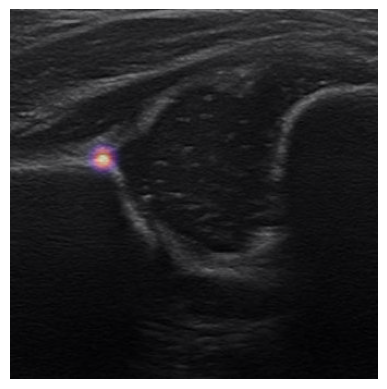

In [11]:
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
def json_to_numpy(dataset_path):
    with open(dataset_path,  'r', encoding='utf8') as fp:
        json_data = json.load(fp)
        points = json_data['shapes']
    landmarks = []
    for point in points:
        if point['label'] == '基线点':
            for p in point['points']:
                landmarks.append(p)
    for point in points:
        if point['label'] == '骨缘点':
            for p in point['points']:
                landmarks.append(p)
    for point in points:
        if point['label'] == '髂骨下缘点':
            for p in point['points']:
                landmarks.append(p)
    for point in points:
        if point['label'] == '盂唇中心点':
            for p in point['points']:
                landmarks.append(p)
    for point in points:
        if point['label'] == '骨性髋臼顶凸面最高点':
            for p in point['points']:
                landmarks.append(p)
    for point in points:
        if point['label'] == '回声失落点':
            for p in point['points']:
                landmarks.append(p)         
    assert len(landmarks)==6
    print(landmarks)
    landmarks = np.array(landmarks)
    landmarks = landmarks.reshape(-1, 2)
    points=[]
    for x in landmarks:
        points.append(tuple(x))
    return points
def generate_heatmaps(joints, scare, offset, input_h, input_w, gauss):
    target = np.zeros((len(joints), input_h, input_w), dtype=np.float32)
    for joint_id, joint in enumerate(joints):
        mu_x = joint[0] * scare + offset
        mu_y = joint[1] * scare + offset
        x = np.arange(0, input_w, 1, np.float32)
        y = np.arange(0, input_h, 1, np.float32)
        y = y[:, np.newaxis]
        target[joint_id] = np.exp(-((x - mu_x) ** 2 + (y - mu_y) ** 2) / (2 * gauss ** 2))
    return target * 255
# Load image
image_path = "6.jpg"
image = plt.imread(image_path)
# Load and process landmarks
dataset_path = "6.json"
landmarks = json_to_numpy(dataset_path)
# Generate heatmaps
scare = 1  # scaling factor
offset = 0  # offset factor
input_h, input_w = image.shape[:2]  # assuming image has shape (height, width)
gauss = 7  # gaussian sigma
heatmaps = generate_heatmaps(landmarks, scare, offset, input_h, input_w, gauss)
# Display image
plt.imshow(image)
plt.imshow(heatmaps[1], alpha=0.5, cmap='magma', interpolation='nearest')#magma
plt.axis('off')
plt.show()

In [ ]:
# Make the image size consistent

In [2]:
import cv2
def resize_images(folder_path, avg_width, avg_height):
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            img = cv2.imread(os.path.join(folder_path, filename))
            resized_img = cv2.resize(img, (avg_width, avg_height))
            cv2.imwrite(os.path.join('resized', filename.split('.')[0] + '_resized.jpg'), resized_img)
def calculate_average_size(folder_path):
    total_width = 0
    total_height = 0
    num_images = 0
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            img = cv2.imread(os.path.join(folder_path, filename))
            total_width += img.shape[1]  # 宽度
            total_height += img.shape[0]  # 高度
            num_images += 1
    avg_width = int(total_width / num_images)
    avg_height = int(total_height / num_images)
    return avg_width, avg_height

In [5]:
folder_path = 'keypoint'  # Specify the path to the folder containing the images
avg_width, avg_height = calculate_average_size(folder_path)
resize_images(folder_path, avg_width, avg_height)